<a href="https://colab.research.google.com/github/spierscaleb004/4410-HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Samples: 569 Features: 30
Labels: [0 1]
Training set size: (455, 30)
Test set size: (114, 30)
GNB Accuracy: 0.9736842105263158
Confusion Matrix:
 [[40  3]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



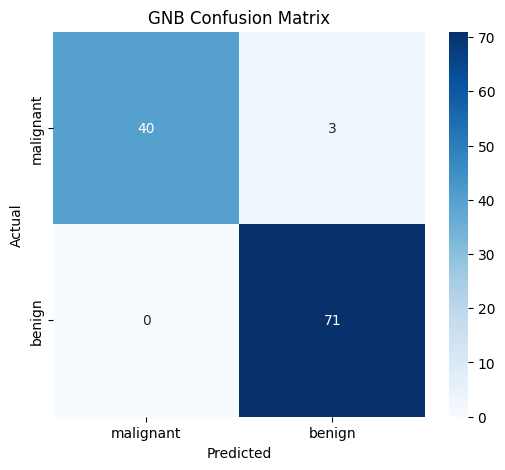

GaussianNB Accuracy: 0.9737
KNeighborsClassifier Accuracy: 0.9561
LogisticRegression Accuracy: 0.9561
SVC Accuracy: 0.9474


In [7]:
# Import all the libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Dataset
data = load_breast_cancer()
x = data.data
y = data.target

# Check shape
print("Samples:", x.shape[0], "Features:", x.shape[1])
print("Labels:", np.unique(y))

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

# Create GNB Model
nb = GaussianNB()

# Train
nb.fit(x_train, y_train)

# Predict
y_pred = nb.predict(x_test)

# Evaluate
print("GNB Accuracy:", nb.score(x_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Visualize Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('GNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")